# **Section 1: Let's create an artificial neuron** 😍

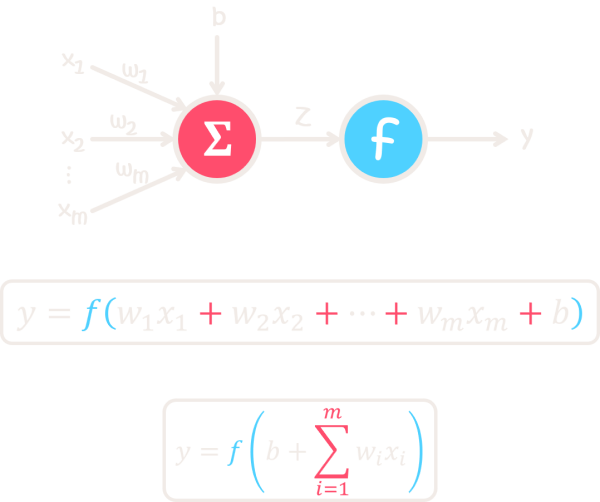

### Imports

In [1]:
import torch

## **Section 1.1: Simple neuron**

### Input, weight and bias

In [2]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

w = torch.tensor([1., 0.5, 1., -1., -0.5])

b = torch.tensor(1.)

### Linear activation function

In [3]:
def linear(x):
    return x

### Step activation function

In [4]:
def step(x):
    if x > 0:
        return torch.tensor(1.0)
    elif x < 0:
        return torch.tensor(0.0)
    else:
        return torch.tensor(0.5)

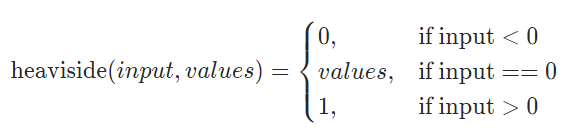

In [5]:
torch.heaviside(input=torch.tensor(-1.0), values=torch.tensor(0.5))

tensor(0.)

### Neuron function

In [6]:
def neuron(x, w, b, af):
    z = 0
    for x_i, w_i in zip(x, w):
        z += x_i * w_i
    z += b
    y = af(z)
    return y

### Test 

In [7]:
neuron(x[0], w, b, linear)

tensor(-1.5000)

In [8]:
neuron(x[0], w, b, step)

tensor(0.)

## **Section 1.2: Vectorization** 🕶

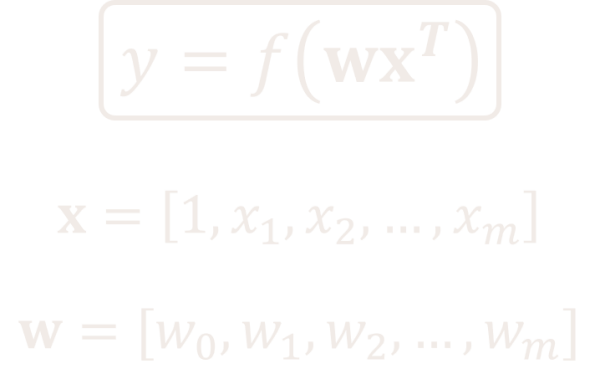

In [9]:
def neuron(x, w, b, af):
  y = af(x @ w + b)
  return y

In [10]:
neuron(x[0], w, b, linear)

tensor(-1.5000)

In [11]:
neuron(x[0], w, b, step)

tensor(0.)

## **Section 1.3: Class Neuron 🔥**

In [12]:
class Neuron:
    def __init__(self, m, af):
        self.w = torch.randn(m)
        self.b = torch.randn(1)
        self.af = af

    def __call__(self, x):
        y = self.af(self.w @ x + self.b)
        return y

In [13]:
neuron_2 = Neuron(5, linear)

In [14]:
neuron_2(x[0])  # call

tensor([6.2277])

# **Section 2: Loss functions 🍉** 

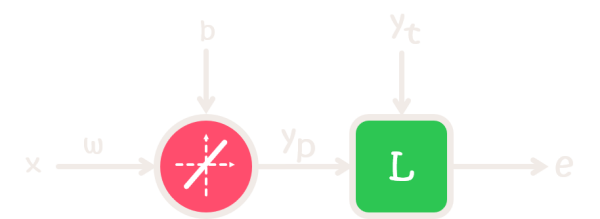

## Imports

In [15]:
import torch
from torch import nn
import torch.nn.functional as F

## Prediction and target

In [16]:
yp = torch.tensor([-0.39, -0.47,  0.61, -0.75,  0.31, -0.54,  0.61, -2.83, 1.24,  0.10])

yt = torch.tensor([-0.39,  1.00,  0.51, -0.85,  0.31, -0.04,  1.01, -0.55, 1.24,  0.10])

## Mean Squared Error (MSE)
\begin{align}
MSE &= \frac{1}{n} \sum_{i=1}^n (y_{p_i}-y_{t_i})^2
\end{align}

### From scratch

In [17]:
torch.mean((yp - yt) ** 2)

tensor(0.7789)

### MSE class in pytorch

In [18]:
mse = nn.MSELoss()
mse

MSELoss()

In [19]:
mse(yp, yt)

tensor(0.7789)

### MSE function in pytorch

In [20]:
F.mse_loss(yp, yt)

tensor(0.7789)

## Mean Absolute Error (MAE)
\begin{align}
MAE &= \frac{1}{n} \sum_{i=1}^n |y_{p_i}-y_{t_i}|
\end{align}

### From scratch

In [21]:
mae = torch.mean(torch.abs((yp - yt)))
mae

tensor(0.4850)

### MAE class in pytorch

In [22]:
mae = nn.L1Loss()
mae(yp, yt)

tensor(0.4850)

### MAE function in pytorch

In [23]:
F.l1_loss(yp, yt)

tensor(0.4850)

## Connect neuron to loss funtion! ⚡


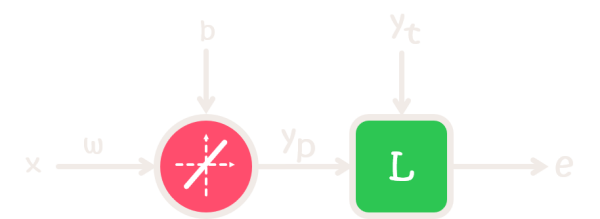

### From Section 1

In [24]:
class Neuron:

  def __init__(self, m, af):
      self.w = torch.randn(m)
      self.b = torch.randn(1)
      self.af = af

  def __call__(self, x):
      if self.af == 'linear':
        y = self.linear(self.w @ x + self.b)
      elif self.af == 'step':
        y = self.step(self.w @ x + self.b)
      return y

  def linear(self, x):
      return x

  def step(self, x):
      if x > 0:
        return torch.tensor(1.0)
      elif x < 0:
        return torch.tensor(0.0)
      else:
        return torch.tensor(0.5)

In [25]:
neuron = Neuron(5, 'linear')

### Input & target

In [26]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### Now give output of the neuron to the loss funtion

In [27]:
yp = neuron(x[0])

e = F.mse_loss(yp, yt[0:1])
print(e)

tensor(0.1515)


In [28]:
yp = neuron(x[0])

e = F.l1_loss(yp, yt[0:1])
print(e)

tensor(0.3893)


# **Section 3: Gradient descent** 🔄

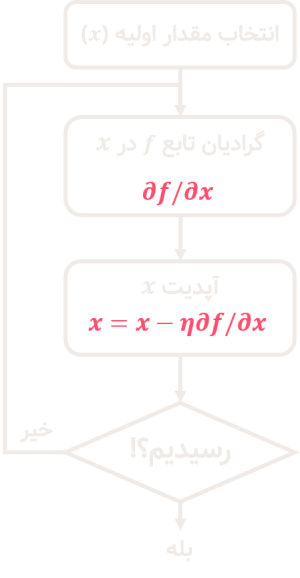

## Imports

In [29]:
import torch

## Visualization

In [30]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [31]:
def plot(x, func):
  plt.figure(figsize=(8, 6))
  plt.plot(x, func(x), linewidth=3)
  plt.xlabel('x', fontsize=15)
  plt.ylabel('f(x)', fontsize=15)
  plt.show()

In [32]:
def animate(x, func, gradfunc, xi, eta, N):
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  xi_hist.append(xi.clone())
  for iter in range(N):
    xi = gradient_descent(gradfunc, xi, eta, 1)
    xi_hist.append(xi.clone())
  xi_hist = torch.tensor(xi_hist)
  fxi_hist = func(xi_hist)
  # plot animation
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)
  def plot_animate(i):
    ax.clear()
    ax.plot(x, func(x), linewidth=3)
    ax.plot(xi_hist[0:i], fxi_hist[0:i], color='black', linewidth=4)
    ax.plot(xi_hist[0], fxi_hist[0], 'r*', markersize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
  ani = animation.FuncAnimation(fig, plot_animate,
                                frames=len(xi_hist),
                                interval=120,
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

## Find the minimum of $ f(x) = x^{2} $

### Implement $ f $

In [33]:
def func_x2(x):
    return x ** 2

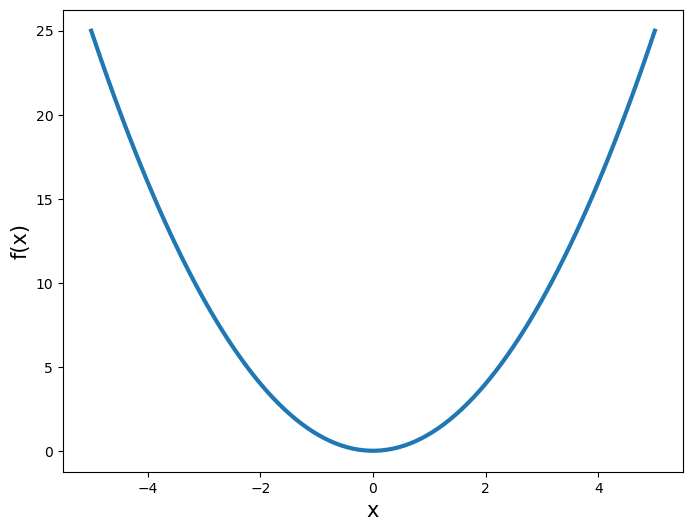

In [34]:
x = torch.linspace(-5, 5, 100)
plot(x, func_x2)

### Implement gradient function

In [35]:
def grad_fx2(x):
    return 2*x

### Implement gradient descent

In [36]:
def gradient_descent(gradfunc, xi, eta, N):
  for _ in range(N):
    dy = gradfunc(xi)
    xi -= eta * dy
  return xi

In [37]:
N = 50
eta = 0.1
xi = torch.tensor(-4.)
gradient_descent(grad_fx2, xi, eta, N)

tensor(-5.7090e-05)

### Animation

In [38]:
xi = torch.tensor(-4.)
eta = 0.3
N = 50

animate(x, func_x2, grad_fx2, xi, eta, N)

## Find the minimum
$ f(x) = 0.125x^4-0.1875x^3-0.75x^2+0.5x $

$ f^{'}(x) = 0.5x^3-0.5625x^2-1.5x+0.5$

$ x \in [-2.5, 3.3] $

### Implement $ f $ and its gradient

In [39]:
def funcx4(x):
  return 0.125*x**4 - 0.1875*x**3 - 0.75*x**2 + 0.5*x

In [40]:
def gradfx4(x):
  return 0.5*x**3 - 0.5625*x**2 - 1.5*x + 0.5

### Animation

In [41]:
x = torch.linspace(-2.5, 3.3, 100)
xi = torch.tensor(1.)
eta = 0.3
N = 30

animate(x, funcx4, gradfx4, xi, eta, N)

## Find the minimum
$ f(x) = log( 1 + |x| ) ^ {2 + sin(x)} $

$ x \in [-10.5, 10.5] $

### Implement $ f $

In [42]:
def funclog(x):
  return torch.log(1 + torch.abs(x)) ** (2 + torch.sin(x))

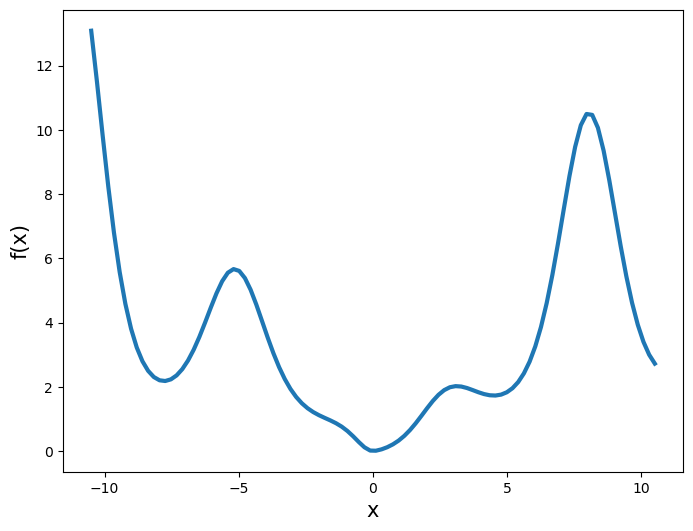

In [43]:
x = torch.linspace(-10.5, 10.5, 100)
plot(x, funclog)

### Implement gradient function 😨

In [44]:
# ???!!! 

### Animatation

# **Section 4: Autograd 🚗**

## Imports

In [45]:
import torch

## Visualization

In [46]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [47]:
def plot(x, func):
  plt.figure(figsize=(8, 6))
  plt.plot(x, func(x), linewidth=3)
  plt.xlabel('x', fontsize=15)
  plt.ylabel('f(x)', fontsize=15)
  plt.show()

In [48]:
def animate(x, func, gradfunc, xi, eta, N):
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  xi_hist.append(xi.clone())
  for iter in range(N):
    xi = gradient_descent(gradfunc, xi, eta, 1)
    xi_hist.append(xi.clone())
  xi_hist = torch.tensor(xi_hist)
  fxi_hist = func(xi_hist)
  # plot animation
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)
  def plot_animate(i):
    ax.clear()
    ax.plot(x, func(x), linewidth=3)
    ax.plot(xi_hist[0:i], fxi_hist[0:i], color='black', linewidth=4)
    ax.plot(xi_hist[0], fxi_hist[0], 'r*', markersize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
  ani = animation.FuncAnimation(fig, plot_animate,
                                frames=len(xi_hist),
                                interval=120,
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

## Derivative of $ f(x) = x^{2} $ with autograd pytorch `backward`

In [49]:
x = torch.tensor(3., requires_grad=True)
y = x ** 2
print(y)
y.backward()
x.grad

tensor(9., grad_fn=<PowBackward0>)


tensor(6.)

## Find the minimum of $ f(x) = x^{2} $ with pytorch autograd `backward`

### Implement $ f $

In [50]:
def func_x2(x):
  return x**2

### Implement gradient descent

In [51]:
def gradient_descent(func, xi, eta, N):
  for _ in range(N):
    func(xi).backward()
    xi.data -= eta * xi.grad
    xi.grad.zero_()
  return xi

In [52]:
xi = torch.tensor(3., requires_grad=True)
eta = 0.1
N = 50
gradient_descent(func_x2, xi, eta, N)

tensor(4.2817e-05, requires_grad=True)

### Animation

In [53]:
xi = torch.tensor(-4., requires_grad=True)
eta = 0.1
N = 50
x = torch.linspace(-4., 4, 100)

animate(x, func_x2, None, xi, eta, N)

## Find the minimum
$ f(x) = log( 1 + |x| ) ^ {2 + sin(x)} $

$ x \in [-10.5, 10.5] $

### Implement $ f $

In [54]:
def funclog(x):
  return torch.log(1 + torch.abs(x))**(2 + torch.sin(x))

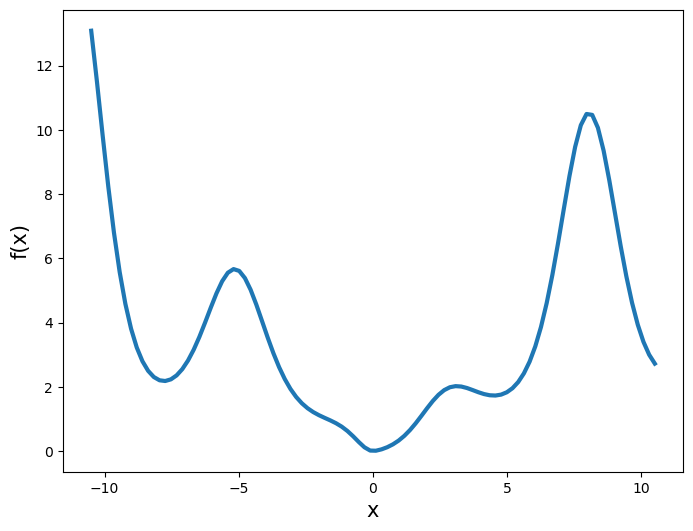

In [55]:
x = torch.linspace(-10.5, 10.5, 100)
plot(x, funclog)

### Animatation 😎

In [56]:
xi = torch.tensor(-4., requires_grad=True)
eta = 0.3
N = 50

animate(x, funclog, None, xi, eta, N)

## Find the minimum
$ f(x) = (x^2 - 1)^3 $

$ x \in [-1.5, 1.5] $

### Implement $ f $

In [57]:
def funcx3(x):
  return (x ** 2 - 1) ** 3

### Visualize $ f $

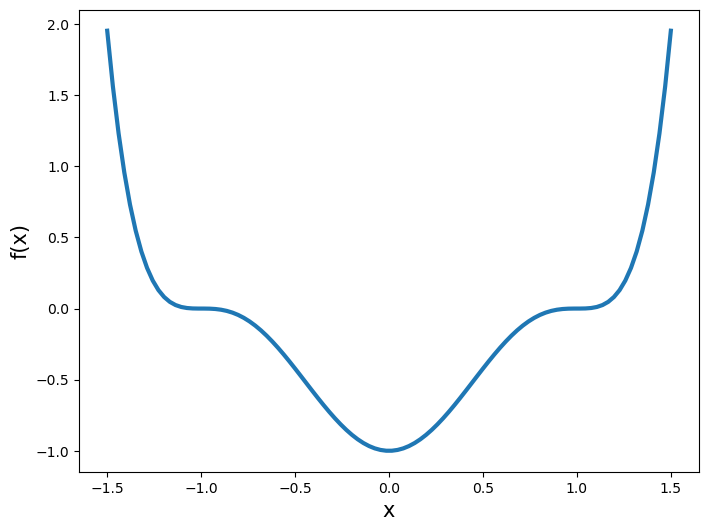

In [58]:
x = torch.linspace(-1.5, 1.5, 100)
plot(x, funcx3)

### Animatation 

In [59]:
xi = torch.tensor(-1.5, requires_grad=True)
eta = 0.1
N = 100

animate(x, funcx3, None, xi, eta, N)

## 3D

In [ ]:
!pip install matplotlib==2.2.3

### Imports

In [61]:
import torch

### Visualization

In [62]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [63]:
def plot3d(x, y, func):
  x, y = torch.meshgrid(x, y)
  z = func(x, y)
  fig = plt.figure(figsize=(15, 10))
  ax = plt.axes(projection='3d')
  ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), cmap='viridis')
  plt.show()

In [64]:
def animate3d(x, y, func, gradfunc, xi, yi, eta, N):
  x, y = torch.meshgrid(x, y)
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  yi_hist = []
  xi_hist.append(xi.clone())
  yi_hist.append(yi.clone())
  for iter in range(N):
    xi, yi = gradient_descent3d(gradfunc, xi, yi, eta, 1)
    xi_hist.append(xi.clone())
    yi_hist.append(yi.clone())
  xi_hist = torch.tensor(xi_hist, requires_grad=False)
  yi_hist = torch.tensor(yi_hist, requires_grad=False)
  fi_hist = func(xi_hist, yi_hist)
  # plot animation
  fig = plt.figure(figsize=(15, 10))
  ax = plt.axes(projection='3d')
  def plot_animate(i):
    ax.clear()
    ax.plot_surface(x.numpy(), y.numpy(), func(x, y).numpy(), cmap='viridis')
    ax.plot(xi_hist[0:i].tolist(), yi_hist[0:i].tolist(), fi_hist[0:i].tolist(),
            color='black', linewidth=4)
    ax.plot([xi_hist[0]], [yi_hist[0]], [fi_hist[0]],
            'r*', markersize=15)
  ani = animation.FuncAnimation(fig, plot_animate,
                                frames=len(xi_hist),
                                interval=60,
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

### Find the minimum
$ f(x,y) = xe^{-x^2-y^2}+0.05(x^2+y^2) $

$ x,y \in [-2, 2] $

Implement $ f $

In [65]:
def func3d(x, y):
  return x * torch.exp(-x**2 - y**2) + 0.05 * (x**2 + y**2)

Visualize $ f $

/home/yousef/miniconda3/envs/ml/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400366987/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


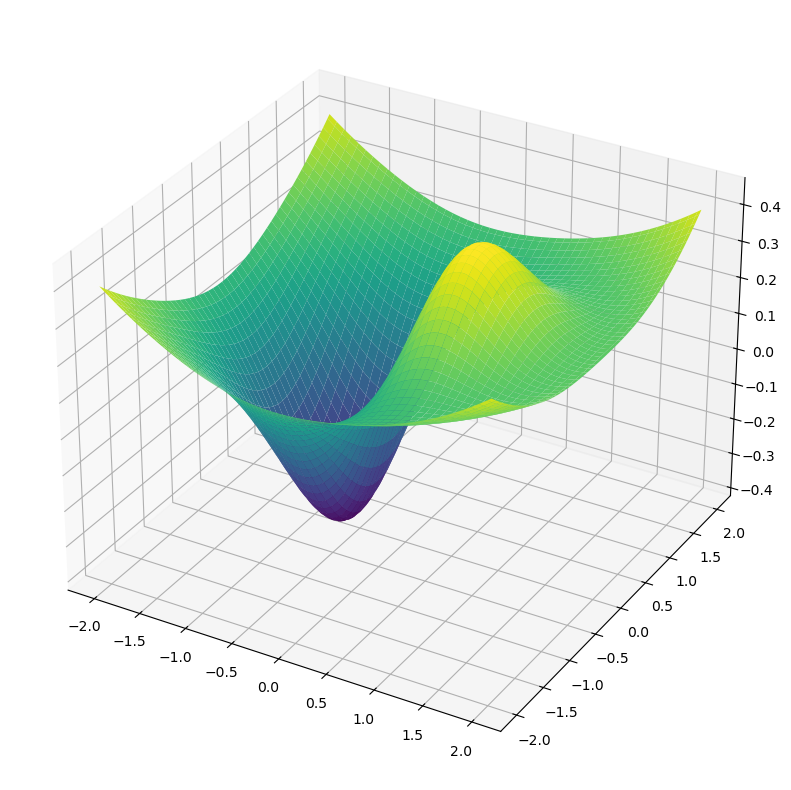

In [66]:
x = torch.linspace(-2, 2, 100)
y = torch.linspace(-2, 2, 100)

plot3d(x, y, func3d)

Gradient descent

In [67]:
def gradient_descent3d(func, xi, yi, eta, N):
  for _ in range(N):
    func(xi, yi).backward()
    xi.data -= eta * xi.grad
    yi.data -= eta * yi.grad
    xi.grad.zero_()
    yi.grad.zero_()
  return xi, yi

Animate

In [68]:
xi = torch.tensor(-2., requires_grad=True)
yi = torch.tensor(2., requires_grad=True)
eta = 0.1
N = 100

animate3d(x, y, func3d, None, xi, yi, eta, N)

### Find the minimum
$ f(x,y) = x^2-y^2 $

$ x,y \in [-2, 2] $

Implement $ f $

In [69]:
def func3d(x, y):
  return x ** 2 - y ** 2

Visualize $ f $

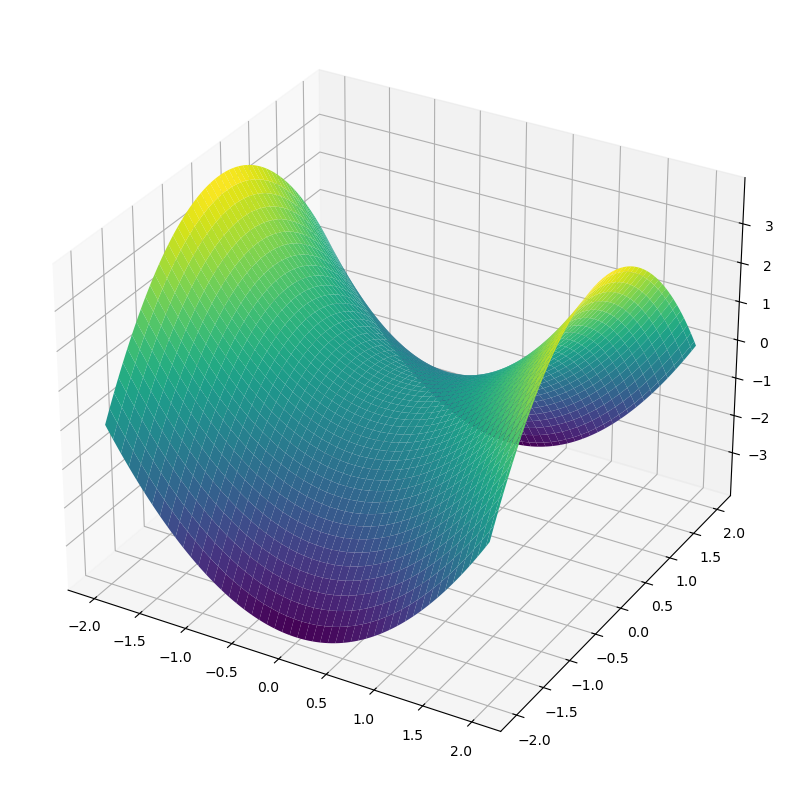

In [70]:
x = torch.linspace(-2, 2, 100)
y = torch.linspace(-2, 2, 100)

plot3d(x, y, func3d)

In [71]:
def gradient_descent3d(func, xi, yi, eta, N):
  for _ in range(N):
    func(xi, yi).backward()
    xi.data -= eta * xi.grad
    yi.data -= eta * yi.grad
    xi.grad.zero_()
    yi.grad.zero_()
  return xi, yi

Animate

In [72]:
animate3d(x, y, func3d, None, xi, yi, eta, N)

## Now connect grad function to the train block diagram! ⚡

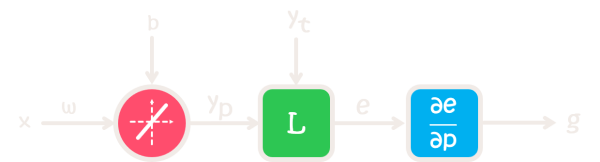

### Imports

In [73]:
import torch
import torch.nn.functional as F

### Input & target

In [74]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### From Section 1

In [75]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m, requires_grad=True)
      self.b = torch.randn(1, requires_grad=True)
      self.af = af

  def __call__(self, x):
    if self.af == 'linear':
      y = self.linear(self.w @ x + self.b)
    elif self.af == 'step':
      y = self.step(self.w @ x + self.b)
    return y

  def linear(self, x):
    return x

  def step(self, x):
    pass

In [76]:
neuron = Neuron(5, 'linear')

In [77]:
neuron.w

tensor([ 2.2081, -0.0440,  1.1672, -0.6636,  0.1533], requires_grad=True)

In [78]:
yp = neuron(x[0])

### From Section 2

In [79]:
e = F.mse_loss(yp, yt[[0]])

In [80]:
e

tensor(1.4055, grad_fn=<MseLossBackward0>)

### Now calculate the gradient of `(w,b)`

In [81]:
e.backward()

In [82]:
neuron.w.grad

tensor([-2.3711, -4.7422, -0.0000, -9.4844, -2.3711])

In [83]:
neuron.b.grad

tensor([-2.3711])

# **Section 5: Optimizer ⏰**

## Imports

In [84]:
import torch
from torch import optim

## Find the minimum of $ f(x) = x^{2} $ 

### Implement $ f $

In [85]:
def func_x2(x):
  return x**2

### Implement gradient descent

In [86]:
xi = torch.tensor(-3., requires_grad=True)

In [87]:
params = [xi]
eta = 0.1
optimizer = optim.SGD(params=params, lr=eta)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [88]:
N = 30

for _ in range(N):
    func_x2(xi).backward()
    optimizer.step()
    optimizer.zero_grad()

In [89]:
xi

tensor(-0.0037, requires_grad=True)

## Find the minimum
$ f(x,y) = xe^{-x^2-y^2}+0.05(x^2+y^2) $

$ x,y \in [-2, 2] $

### Implement $ f $

In [90]:
def func3d(x, y):
  return x * torch.exp(-x**2-y**2) + 0.05*(x**2+y**2)

### Gradient descent

In [91]:
xi = torch.tensor(-1.8, requires_grad=True)
yi = torch.tensor(1.8, requires_grad=True)

In [92]:
params = [xi, yi]
eta = 0.1
optimizer = optim.SGD(params, eta)

In [93]:
N = 100

for iter in range(N):
  func3d(xi, yi).backward()
  optimizer.step()
  optimizer.zero_grad()

In [94]:
xi, yi

(tensor(-0.6691, requires_grad=True), tensor(0.0032, requires_grad=True))

In [95]:
optimizer.param_groups

[{'params': [tensor(-0.6691, requires_grad=True),
   tensor(0.0032, requires_grad=True)],
  'lr': 0.1,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False}]

In [96]:
optimizer.param_groups[0]['params']

[tensor(-0.6691, requires_grad=True), tensor(0.0032, requires_grad=True)]

## Now connect optimzier to the train block diagram! ⚡

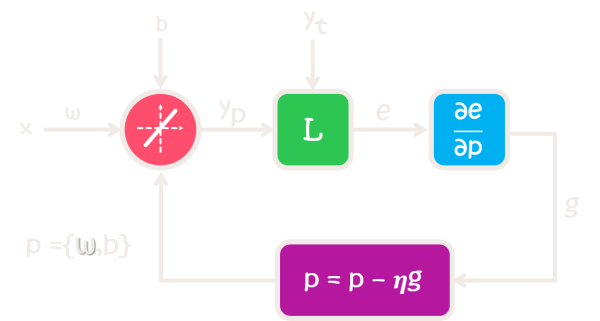

### Imports

In [97]:
import torch
import torch.nn.functional as F
from torch import optim

### Input & target

In [98]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### From Section 1

In [99]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m, requires_grad=True)
      self.b = torch.randn(1, requires_grad=True)
      self.af = af

  def __call__(self, x):
    if self.af == 'linear':
      y = self.linear(self.w @ x + self.b)
    elif self.af == 'step':
      y = self.step(self.w @ x + self.b)
    return y

  def linear(self, x):
    return x

  def step(self, x):
    pass

In [100]:
neuron = Neuron(5, 'linear')

In [101]:
yp = neuron(x[0])

### From Section 2

In [102]:
e = F.mse_loss(yp, yt[[0]])
e

tensor(13.6659, grad_fn=<MseLossBackward0>)

### From Section 4

In [103]:
e.backward()

In [104]:
neuron.w.grad, neuron.b.grad

(tensor([ -7.3935, -14.7870,  -0.0000, -29.5740,  -7.3935]), tensor([-7.3935]))

### Now add optimizer!

In [105]:
params = [neuron.w, neuron.b]
eta = 0.1

optimizer = optim.SGD(params=params, lr=eta)

In [106]:
optimizer.step()
optimizer.zero_grad()

### Final

In [107]:
for _ in range(N):
    yp = neuron(x[0])
    e = F.mse_loss(yp, yt[0:1])
    e.backward()
    optimizer.step()
    optimizer.zero_grad()

# **Section 6: Create the First Neural Network 🧠**

In [108]:
import torch
from torch import nn

## Example 1: single neuron 

In [110]:
fc = nn.Linear(in_features=5, out_features=1)
fc

Linear(in_features=5, out_features=1, bias=True)

In [111]:
fc.bias

Parameter containing:
tensor([0.0460], requires_grad=True)

In [112]:
fc.weight

Parameter containing:
tensor([[ 0.3892, -0.4229,  0.3398,  0.3657,  0.2432]], requires_grad=True)

In [118]:
x = torch.randn(100, 5)
x

tensor([[-1.0828e+00,  4.7221e-01,  1.4453e+00,  7.5768e-01, -1.2317e+00],
        [-5.6287e-01, -1.1768e+00, -7.7395e-01,  9.0984e-02,  7.2027e-02],
        [ 6.1070e-01,  8.8922e-01, -8.3900e-01, -6.0515e-01, -8.7615e-01],
        [ 1.4949e+00,  1.5521e+00, -2.4584e-01,  2.9279e-01,  3.0756e-01],
        [ 9.1466e-01,  2.3544e-01, -8.3323e-01,  1.3568e-01,  7.4057e-01],
        [ 1.9915e-01,  1.1259e+00, -1.1039e+00, -1.5284e+00,  3.7884e-01],
        [-4.2491e-01,  1.2074e+00,  1.2060e+00, -1.2805e+00,  1.0291e+00],
        [-1.4286e+00, -1.0353e+00,  1.2187e+00,  1.6187e+00, -4.7047e-01],
        [-1.3144e+00, -4.8497e-01,  1.2825e-01, -1.3570e+00, -9.0251e-01],
        [ 1.1180e+00, -2.3825e+00, -1.9425e-01, -1.0734e+00, -8.9807e-01],
        [ 1.7977e+00,  2.1417e-01, -8.1028e-01, -7.6167e-02, -1.8878e-01],
        [-4.3341e-01, -6.1398e-02,  1.1396e+00, -2.7658e-01, -1.1454e+00],
        [-3.7060e-01, -8.4653e-02,  3.6461e-01, -2.0548e+00,  6.8317e-01],
        [ 7.0551e-01, -6.

In [119]:
fc(x)

tensor([[-0.1066],
        [ 0.1124],
        [-0.8119],
        [ 0.0697],
        [ 0.2491],
        [-1.1946],
        [-0.4383],
        [ 0.8194],
        [-0.9328],
        [ 0.8118],
        [ 0.3060],
        [-0.0893],
        [-0.5239],
        [ 0.8835],
        [-0.4446],
        [ 0.1133],
        [-1.4670],
        [ 0.4854],
        [-0.7844],
        [ 0.2334],
        [-0.0820],
        [-0.1181],
        [ 0.3927],
        [ 0.0350],
        [-0.5171],
        [ 0.6073],
        [-0.4929],
        [-0.0746],
        [-0.4758],
        [ 0.8451],
        [-0.2955],
        [ 0.1406],
        [-0.1252],
        [ 0.1155],
        [ 0.9271],
        [ 0.5501],
        [ 0.0846],
        [-0.6680],
        [-0.1674],
        [-0.4224],
        [ 1.1753],
        [-0.1062],
        [ 0.7133],
        [-1.2746],
        [-0.0983],
        [ 0.3376],
        [ 0.0817],
        [-0.0561],
        [-0.5905],
        [-0.1079],
        [-0.1862],
        [-0.8759],
        [ 0.

## Example 2: fully connected layer (perceptron layer)

In [125]:
fc = nn.Linear(in_features=4, out_features=5, bias=False)
fc

Linear(in_features=4, out_features=5, bias=False)

In [126]:
x = torch.tensor([[94., 69, 33, 42],
                  [66, 72, 21, 99],
                  [98, 59, 54, 38],
                  [60, 86, 37, 21],
                  [29, 65, 41, 78],
                  [56,  5, 99, 11]])  #shape[6,4]

In [127]:
fc(x).shape

torch.Size([6, 5])

In [128]:
fc.weight, fc.bias

(Parameter containing:
 tensor([[-0.2786,  0.2809,  0.4542,  0.3634],
         [-0.2772,  0.0051, -0.0278, -0.1287],
         [-0.0449, -0.1831,  0.3037, -0.3799],
         [ 0.1265, -0.1364, -0.1492,  0.0525],
         [-0.3742, -0.3481,  0.3641,  0.2565]], requires_grad=True),
 None)

## Example 3: MLP

In [129]:
x = torch.tensor([[  6.,   9,   5],
                  [ -1,  -10,   5],
                  [  2,   -1,  -9],
                  [  3,    1,   1]]) #[n_sample=4, n_feature=3]

In [130]:
fc1 = nn.Linear(in_features=3, out_features=8)
fc2 = nn.Linear(in_features=8, out_features=5, bias=False)

In [131]:
fc2(fc1(x))

tensor([[ 0.7307,  2.8626,  0.2776,  0.6024,  2.6868],
        [-0.8878, -1.5457, -1.2841, -2.2346,  0.4410],
        [-0.5448, -1.8507,  1.0997,  1.9224, -1.9110],
        [-0.0746,  0.3193,  0.0901,  0.2224,  0.7718]], grad_fn=<MmBackward0>)

In [132]:
mlp = nn.Sequential(
    nn.Linear(3, 8),
    nn.Linear(8, 5)
)
mlp

Sequential(
  (0): Linear(in_features=3, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=5, bias=True)
)

In [133]:
mlp(x)

tensor([[-1.2356, -1.0536, -0.7445,  1.0142,  0.2984],
        [ 1.0902,  0.4445,  1.8011, -1.1651,  1.7664],
        [-1.4660, -1.7578, -0.8789, -0.4980,  1.1058],
        [-0.6801, -0.8580, -0.0944, -0.0068,  0.9343]],
       grad_fn=<AddmmBackward0>)

In [134]:
mlp[0]

Linear(in_features=3, out_features=8, bias=True)

In [135]:
mlp[1].weight

Parameter containing:
tensor([[ 0.3214,  0.2340, -0.1394, -0.3238, -0.2160,  0.0022, -0.2205, -0.1162],
        [ 0.2035, -0.0923,  0.0482, -0.0849, -0.0827, -0.2774, -0.0845, -0.1847],
        [-0.0153,  0.1155, -0.3354, -0.3147, -0.0367,  0.0614, -0.0501,  0.0525],
        [-0.3003,  0.2637, -0.1967, -0.1073,  0.1842, -0.0015, -0.1674, -0.1117],
        [-0.0491,  0.1080, -0.0758, -0.1956,  0.1505,  0.3413, -0.2048,  0.3375]],
       requires_grad=True)

# **Final Section: Train Neural Network 🚅**

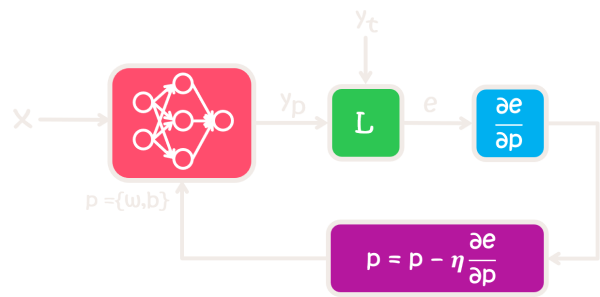

## Imports

In [136]:
import torch
from torch import nn
from torch import optim

import pandas as pd
import matplotlib.pyplot as plt

## Step 1: load data

### Train

In [145]:
df = pd.read_csv('./data/train.csv')
df.head()

,Unnamed: 0,x,y
0,0,0.771270,2.474538
1,1,0.063558,1.192772
2,2,0.863103,2.912784
3,3,0.025419,1.078507
4,4,0.731994,2.473164


In [146]:
df['x'].values

array([0.77127035, 0.06355835, 0.86310343, 0.02541913, 0.73199394,
       0.07404465, 0.19871568, 0.31098232, 0.47221493, 0.96958463,
       0.12203823, 0.77513282, 0.80219698, 0.72960618, 0.09767211,
       0.18485446, 0.15601864, 0.02058449, 0.98688694, 0.62329813,
       0.70807258, 0.59789998, 0.92187424, 0.63755747, 0.28093451,
       0.25877998, 0.11959425, 0.72900717, 0.94888554, 0.60754485,
       0.5612772 , 0.4937956 , 0.18182497, 0.27134903, 0.96990985,
       0.21233911, 0.18340451, 0.86617615, 0.37454012, 0.29122914,
       0.80839735, 0.05808361, 0.83244264, 0.54269608, 0.77224477,
       0.88721274, 0.0884925 , 0.04522729, 0.59241457, 0.68423303,
       0.71324479, 0.03438852, 0.60111501, 0.81546143, 0.44015249,
       0.32518332, 0.78517596, 0.76078505, 0.49517691, 0.19967378,
       0.95071431, 0.29214465, 0.13949386, 0.31171108, 0.70685734,
       0.11586906, 0.35846573, 0.00552212, 0.19598286, 0.89482735,
       0.45606998, 0.52475643, 0.14092422, 0.06505159, 0.17052

In [147]:
x_train = torch.tensor(df['x'].values, dtype=torch.float32).unsqueeze(1)
x_train, x_train.shape

(tensor([[0.7713],
         [0.0636],
         [0.8631],
         [0.0254],
         [0.7320],
         [0.0740],
         [0.1987],
         [0.3110],
         [0.4722],
         [0.9696],
         [0.1220],
         [0.7751],
         [0.8022],
         [0.7296],
         [0.0977],
         [0.1849],
         [0.1560],
         [0.0206],
         [0.9869],
         [0.6233],
         [0.7081],
         [0.5979],
         [0.9219],
         [0.6376],
         [0.2809],
         [0.2588],
         [0.1196],
         [0.7290],
         [0.9489],
         [0.6075],
         [0.5613],
         [0.4938],
         [0.1818],
         [0.2713],
         [0.9699],
         [0.2123],
         [0.1834],
         [0.8662],
         [0.3745],
         [0.2912],
         [0.8084],
         [0.0581],
         [0.8324],
         [0.5427],
         [0.7722],
         [0.8872],
         [0.0885],
         [0.0452],
         [0.5924],
         [0.6842],
         [0.7132],
         [0.0344],
         [0.

In [148]:
y_train = torch.tensor(df['y'].values, dtype=torch.float32)
y_train, y_train.shape

(tensor([2.4745, 1.1928, 2.9128, 1.0785, 2.4732, 1.1713, 1.2654, 1.5245, 1.9857,
         2.8401, 1.2406, 2.4936, 2.6229, 2.5751, 1.4417, 1.5888, 1.2901, 1.1327,
         3.0520, 2.2940, 2.3660, 2.0407, 2.8506, 2.1930, 1.5846, 1.5967, 1.3214,
         2.4927, 2.8903, 2.4037, 2.0472, 1.9060, 1.3734, 1.5105, 2.9727, 1.4760,
         1.4637, 2.6805, 1.7578, 1.4361, 2.6141, 1.2640, 2.6119, 2.2161, 2.4208,
         2.8708, 1.0708, 0.9985, 2.1687, 2.3492, 2.6162, 1.1831, 2.1214, 2.6606,
         1.9105, 1.7291, 2.5283, 2.4970, 1.8735, 1.3651, 2.8715, 1.5848, 1.3051,
         1.7637, 2.4388, 1.1603, 1.7462, 1.0632, 1.4393, 2.7393, 1.7706, 2.0167,
         1.1211, 1.1559, 1.3585, 2.7388, 1.8057, 2.8890, 1.5427, 1.7093]),
 torch.Size([80]))

### Test

In [149]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,Unnamed: 0,x,y
0,0,0.304614,1.615251
1,1,0.155995,1.347700
2,2,0.662522,2.234106
3,3,0.107891,1.298501
4,4,0.909320,2.893834


In [150]:
x_test = torch.FloatTensor(df_test['x'].values).unsqueeze(1)
y_test = torch.FloatTensor(df_test['y'].values)

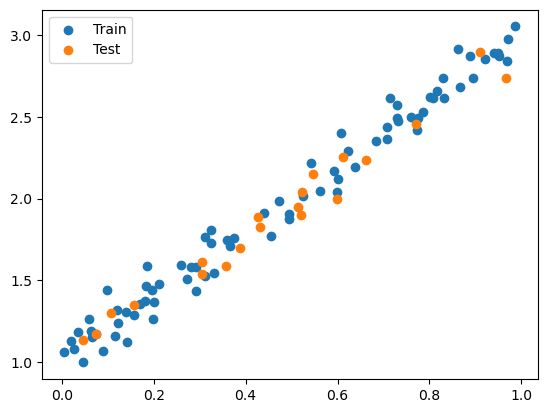

In [154]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.legend(['Train', 'Test']);

## Step 2: build the NN model

In [196]:
model = nn.Linear(in_features=1, out_features=1)
model

Linear(in_features=1, out_features=1, bias=True)

## Step 3: define loss function

In [197]:
loss_fn = nn.MSELoss()

## Step 4: define optimization

In [198]:
model.parameters()

<generator object Module.parameters at 0x7fdff3b75f50>

In [199]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.0559]], requires_grad=True)
Parameter containing:
tensor([-0.4514], requires_grad=True)


In [200]:
for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[0.0559]], requires_grad=True)
bias Parameter containing:
tensor([-0.4514], requires_grad=True)


In [201]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

## Step 5: train looooop! 🍭

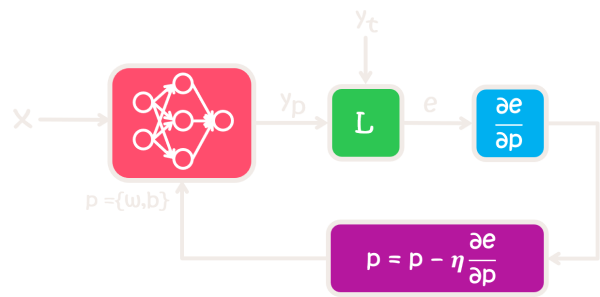

In [202]:
N = 500
loss_hist = []

for iter in range(N):
    yp = model(x_train)
    loss = loss_fn(yp.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist.append(loss.item())
    print(f"Epoch: {iter + 1}, Loss: {loss.item():.3f}")

Epoch: 1, Loss: 6.010
Epoch: 2, Loss: 3.432
Epoch: 3, Loss: 1.974
Epoch: 4, Loss: 1.150
Epoch: 5, Loss: 0.683
Epoch: 6, Loss: 0.418
Epoch: 7, Loss: 0.268
Epoch: 8, Loss: 0.182
Epoch: 9, Loss: 0.133
Epoch: 10, Loss: 0.104
Epoch: 11, Loss: 0.087
Epoch: 12, Loss: 0.077
Epoch: 13, Loss: 0.070
Epoch: 14, Loss: 0.066
Epoch: 15, Loss: 0.063
Epoch: 16, Loss: 0.060
Epoch: 17, Loss: 0.058
Epoch: 18, Loss: 0.056
Epoch: 19, Loss: 0.055
Epoch: 20, Loss: 0.053
Epoch: 21, Loss: 0.052
Epoch: 22, Loss: 0.051
Epoch: 23, Loss: 0.049
Epoch: 24, Loss: 0.048
Epoch: 25, Loss: 0.047
Epoch: 26, Loss: 0.046
Epoch: 27, Loss: 0.045
Epoch: 28, Loss: 0.043
Epoch: 29, Loss: 0.042
Epoch: 30, Loss: 0.041
Epoch: 31, Loss: 0.040
Epoch: 32, Loss: 0.039
Epoch: 33, Loss: 0.038
Epoch: 34, Loss: 0.038
Epoch: 35, Loss: 0.037
Epoch: 36, Loss: 0.036
Epoch: 37, Loss: 0.035
Epoch: 38, Loss: 0.034
Epoch: 39, Loss: 0.033
Epoch: 40, Loss: 0.033
Epoch: 41, Loss: 0.032
Epoch: 42, Loss: 0.031
Epoch: 43, Loss: 0.030
Epoch: 44, Loss: 0.0

## Visualizzzzzze 📈

In [203]:
x_viz = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)

In [204]:
y_viz = model(x_viz)

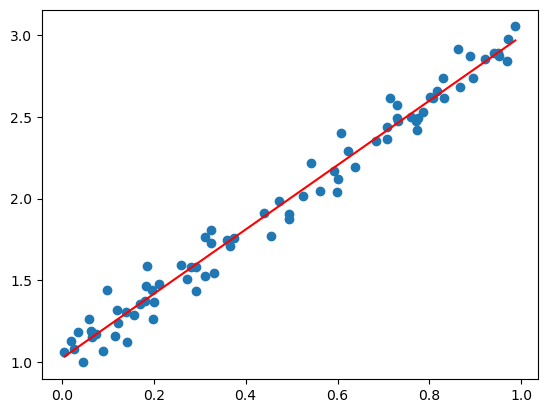

In [205]:
plt.scatter(x_train, y_train)
plt.plot(x_viz.detach(), y_viz.detach(), 'r');

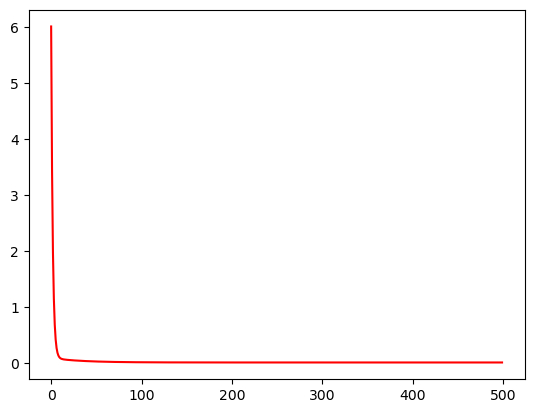

In [207]:
# Learning Curve
plt.plot(range(N), loss_hist, 'r')

## Step 6: test

In [194]:
y_test_p = model(x_test)

In [195]:
F.l1_loss(y_test_p.squeeze(), y_test)

tensor(0.0736, grad_fn=<MeanBackward0>)